# PART 1:- Multinomial Naive Bayes - SMS Spam Ham Classification:

### Importing the required libraries and dependencies:

In [219]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

from imblearn.over_sampling import SMOTE

from sklearn.naive_bayes import MultinomialNB, BernoulliNB

from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, auc

In [3]:
df = pd.read_csv('smsspamcollection.csv', header=None, names=['Class', 'sms'])
df.head()

,Class,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df.shape

(5572, 2)

In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Class   5572 non-null   object
 1   sms     5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None


In [9]:
df.isnull().sum()

Class    0
sms      0
dtype: int64

In [11]:
df.Class.value_counts()

Class
ham     4825
spam     747
Name: count, dtype: int64

#### Mapping labeles to 0 and 1:

In [14]:
df['Class'] = df.Class.map({'spam':1, 'ham':0})
df.head()

,Class,sms
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
df.Class.value_counts()

Class
0    4825
1     747
Name: count, dtype: int64

In [18]:
type(df.sms)

pandas.core.series.Series

In [20]:
X = df.sms
y = df.Class

### Train test split:

In [23]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=42, train_size=0.7)

In [28]:
print(Xtrain.shape)
print(ytrain.shape)
print(Xtest.shape)
print(ytest.shape)

(3900,)
(3900,)
(1672,)
(1672,)


#### Vectorizing the sentences and removing the stopwords:

- converting the strings into a feature representation like DTM

In [47]:
vec = CountVectorizer(stop_words='english')
Xtrain = vec.fit_transform(Xtrain) 
Xtest = vec.transform(Xtest)

In [49]:
vec.vocabulary_

{'quite': 5026,
 'late': 3635,
 'lar': 3630,
 'ard': 944,
 '12': 260,
 'wun': 6908,
 'drivin': 2222,
 'tuesday': 6400,
 'night': 4330,
 'real': 5088,
 'chase': 1558,
 'run': 5321,
 'crossing': 1883,
 'street': 5910,
 'says': 5393,
 'answer': 890,
 'texts': 6158,
 'confirm': 1763,
 'deny': 2033,
 'work': 6865,
 'going': 2865,
 'small': 5676,
 'house': 3169,
 'think': 6195,
 'stop': 5894,
 'like': 3715,
 'hour': 3166,
 'roommate': 5289,
 'looking': 3796,
 'stock': 5885,
 'trip': 6370,
 'lol': 3782,
 'great': 2922,
 'im': 3253,
 'getting': 2819,
 'hungry': 3200,
 'good': 2877,
 'll': 3759,
 'phone': 4695,
 'tomo': 6295,
 'lunchtime': 3856,
 'shall': 5514,
 'organise': 4519,
 'yesterday': 6959,
 'true': 6379,
 'ya': 6932,
 'nice': 4323,
 'ready': 5087,
 'thursday': 6227,
 'hi': 3086,
 'way': 6714,
 '2day': 361,
 'normal': 4367,
 'ur': 6517,
 'unique': 6481,
 'hope': 3144,
 'know': 3570,
 'rest': 5223,
 'mylife': 4236,
 'wot': 6880,
 'lost': 3809,
 'today': 6277,
 'accept': 720,
 'day': 196

In [51]:
len(vec.vocabulary_)

7004

In [59]:
print(Xtrain)

  (0, 5026)	1
  (0, 3635)	1
  (0, 3630)	1
  (0, 944)	1
  (0, 260)	1
  (0, 6908)	1
  (0, 2222)	1
  (1, 6400)	1
  (1, 4330)	1
  (1, 5088)	1
  (2, 1558)	1
  (2, 5321)	1
  (2, 1883)	1
  (2, 5910)	1
  (3, 5393)	1
  (3, 890)	1
  (3, 6158)	1
  (3, 1763)	1
  (3, 2033)	1
  (4, 6865)	1
  (4, 2865)	1
  (4, 5676)	1
  (4, 3169)	1
  (5, 6195)	1
  (5, 5894)	1
  :	:
  (3895, 2892)	1
  (3895, 2081)	1
  (3895, 2278)	1
  (3895, 6852)	1
  (3895, 6836)	1
  (3895, 3734)	1
  (3896, 3759)	1
  (3896, 3638)	1
  (3896, 5752)	1
  (3897, 3049)	1
  (3897, 5099)	1
  (3897, 2712)	1
  (3897, 4852)	1
  (3897, 5757)	1
  (3897, 5756)	1
  (3898, 6286)	1
  (3898, 5482)	1
  (3898, 4387)	1
  (3898, 3464)	1
  (3899, 2081)	1
  (3899, 3493)	1
  (3899, 5389)	1
  (3899, 6076)	1
  (3899, 5724)	1
  (3899, 4250)	1


In [55]:
print(type(Xtrain))

<class 'scipy.sparse._csr.csr_matrix'>


Type is __'csr': Compressed Sparse row Matrix__

#### Using SMOTE -
Synthetic Minority Oversampling Technique to generate synthetic samples for the minority class:

In [63]:
from imblearn.over_sampling import SMOTE

In [65]:
smote = SMOTE()
Xtrain, ytrain = smote.fit_resample(Xtrain, ytrain)

In [72]:
ytrain.value_counts()

Class
0    3377
1    3377
Name: count, dtype: int64

### Building and Evaluting the model:

In [75]:
mnb = MultinomialNB()

mnb.fit(Xtrain, ytrain)
ypred_test = mnb.predict(Xtest)
ypred_test_proba = mnb.predict_proba(Xtest)

In [126]:
mnb.__dict__

{'alpha': 1.0,
 'fit_prior': True,
 'class_prior': None,
 'force_alpha': True,
 'n_features_in_': 7004,
 'classes_': array([0, 1], dtype=int64),
 'class_count_': array([3377., 3377.]),
 'feature_count_': array([[ 0.,  0.,  1., ...,  0.,  1.,  1.],
        [19., 75.,  0., ...,  1.,  0.,  0.]]),
 'feature_log_prob_': array([[-10.33647055, -10.33647055,  -9.64332337, ..., -10.33647055,
          -9.64332337,  -9.64332337],
        [ -7.30971425,  -5.97471318, -10.30544652, ...,  -9.61229934,
         -10.30544652, -10.30544652]]),
 'class_log_prior_': array([-0.69314718, -0.69314718])}

These are the default values for all the params that the mnb has.

__Notice:__  alhpa - LaplaceSmoothing is by default 1

In [89]:
print(ypred_test.ndim)
print(ypred_test)

1
[0 0 0 ... 0 1 0]


### Evaluating the model:

In [91]:
print(ypred_test_proba.ndim)
print(ypred_test_proba)

2
[[9.99994937e-01 5.06348137e-06]
 [9.98150620e-01 1.84938027e-03]
 [9.99999992e-01 7.55661426e-09]
 ...
 [9.99999995e-01 5.08485759e-09]
 [1.03892729e-14 1.00000000e+00]
 [9.99999996e-01 3.59413754e-09]]


In [95]:
pd.DataFrame({'proba1':ypred_test_proba[:,0], 'proba2':ypred_test_proba[:,1], 'predicted_labels':ypred_test}).head()

,proba1,proba2,predicted_labels
0,0.999995,5.063481e-06,0
1,0.998151,1.849380e-03,0
2,1.000000,7.556614e-09,0
3,0.999993,6.939681e-06,0
4,0.884134,1.158662e-01,0


In [99]:
cm = metrics.confusion_matrix(ytest, ypred_test)
cm

array([[1416,   32],
       [   9,  215]], dtype=int64)

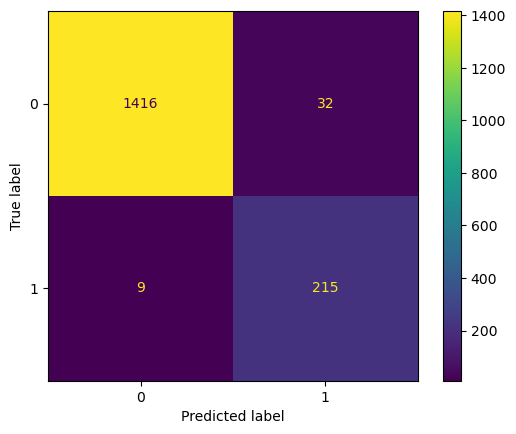

In [107]:
ConfusionMatrixDisplay(cm).plot()

In [139]:
print(f'Accuracy: {round(accuracy_score(ytest, ypred_test), 3)}')
print(f'Recall: {round(recall_score(ytest, ypred_test), 3)}')
print(f'Precision: {round(precision_score(ytest, ypred_test), 3)}')
print(f'F1-Score: {f1_score(ytest, ypred_test)}')

Accuracy: 0.975
Recall: 0.96
Precision: 0.87
F1-Score: 0.9129511677282378


-> In our Case we want to maximize Specificity or PPV/Precision

In [135]:
TN, TP, FN, FP = cm[0,0], cm[1,1], cm[1,0], cm[0,1]

specificity = TN/(TN+FP)
round(specificity, 3)

0.978

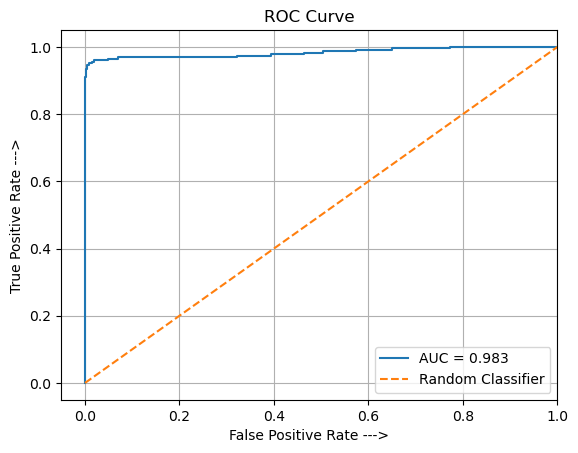

In [180]:
fpr, tpr, threshold = roc_curve(ytest, ypred_test_proba[:,1])
roc_auc = round(auc(fpr, tpr), 3)

# plt.figure(figsize=[8,6])
plt.plot(fpr, tpr, label=f'AUC = {roc_auc}')

plt.plot([0,1], [0,1], '--', label='Random Classifier') #diagonal
plt.xlim(-0.05, 1.0)
plt.ylim(-0.05, 1.05)

plt.xlabel('False Positive Rate --->')
plt.ylabel('True Positive Rate --->')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [172]:
pd.DataFrame({'fpr':fpr, 'tpr':tpr, 'thresholds':threshold}).head(10)

,fpr,tpr,thresholds
0,0.0,0.000000,inf
1,0.0,0.406250,1.000000
2,0.0,0.433036,1.000000
3,0.0,0.441964,1.000000
4,0.0,0.455357,1.000000
5,0.0,0.468750,1.000000
6,0.0,0.678571,1.000000
7,0.0,0.687500,1.000000
8,0.0,0.781250,0.999997
9,0.0,0.799107,0.999995


-----------------

# PART 2:- Bernoulli Naive Bayes - SMS Spam Ham Classification:

In [189]:
df1 = pd.read_csv('smsspamcollection.csv', header=None, names=['Class', 'sms'])
df1.head()

,Class,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [195]:
df1['Class'] = df1.Class.map({'ham':0, 'spam':1})
df1.head()

,Class,sms
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [197]:
X = df.sms
y = df.Class

In [199]:
Xtrain1, Xtest1, ytrain1, ytest1 = train_test_split(X, y, random_state=42, train_size=0.7)

print(Xtrain1.shape)
print(Xtest1.shape)
print(ytrain1.shape)
print(ytest1.shape)

(3900,)
(1672,)
(3900,)
(1672,)


In [211]:
vec1 = CountVectorizer(stop_words='english')
Xtrain1 = vec1.fit_transform(Xtrain1)
Xtest1 = vec1.transform(Xtest1)

In [213]:
# vec1.__dict__

In [217]:
smote1 = SMOTE()

Xtrain1, ytrain1 = smote1.fit_resample(Xtrain1, ytrain1)

In [223]:
bnb = BernoulliNB()
bnb.fit(Xtrain1, ytrain1)

ypred_test1 = bnb.predict(Xtest1)
ypred_test_proba1 = bnb.predict_proba(Xtest1)

[[1395   53]
 [  11  213]]


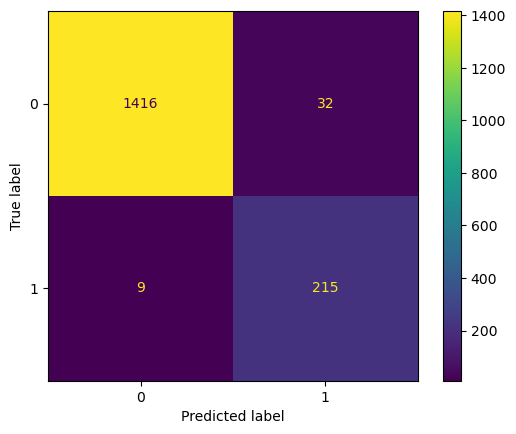

In [231]:
cm1 = metrics.confusion_matrix(ytest1, ypred_test1)

print(cm1)
ConfusionMatrixDisplay(cm).plot()

In [233]:
print(f'Accuracy: {round(accuracy_score(ytest1, ypred_test1), 3)}')
print(f'Recall: {round(recall_score(ytest1, ypred_test1), 3)}')
print(f'Precision: {round(precision_score(ytest1, ypred_test1), 3)}')
print(f'F1-Score: {f1_score(ytest1, ypred_test1)}')

Accuracy: 0.962
Recall: 0.951
Precision: 0.801
F1-Score: 0.8693877551020408


In [235]:
TN, TP, FN, FP = cm[0,0], cm[1,1], cm[1,0], cm[0,1]

specificity = TN/(TN+FP)
round(specificity, 3)

0.978

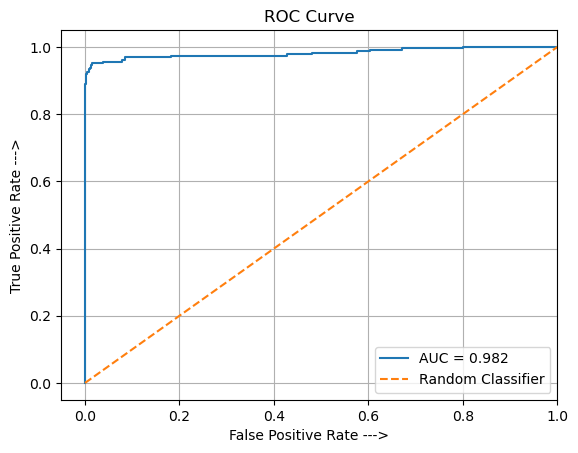

In [237]:
fpr, tpr, threshold = roc_curve(ytest1, ypred_test_proba1[:,1])
roc_auc = round(auc(fpr, tpr), 3)

# plt.figure(figsize=[8,6])
plt.plot(fpr, tpr, label=f'AUC = {roc_auc}')

plt.plot([0,1], [0,1], '--', label='Random Classifier') #diagonal
plt.xlim(-0.05, 1.0)
plt.ylim(-0.05, 1.05)

plt.xlabel('False Positive Rate --->')
plt.ylabel('True Positive Rate --->')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()